# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [60]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [61]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [62]:
# Your code here - prepare data for modeling
#select the relevant numeric columns and center them
# for numeric columns 

ames_numeric = ames[numeric].copy() # create a copy of the numeric feature in the 'ames'

for column in numeric:  #iterate through each column in the numeric feature
    ames_numeric[numeric] = ames_numeric[numeric] - ames_numeric[numeric].mean() #subtract the mean of the column from each value

ames_numeric #display centred numeric df

,LotArea,1stFlrSF,GrLivArea
Id,,,
1,-865.191977,-284.866046,231.095272
2,284.808023,121.133954,-216.904728
3,1934.808023,-220.866046,307.095272
4,234.808023,-179.866046,238.095272
5,4944.808023,4.133954,719.095272
...,...,...,...
1456,-1398.191977,-187.866046,168.095272
1457,3859.808023,932.133954,594.095272
1458,-273.191977,47.133954,861.095272


In [63]:
#for categorical columns

ames_categorical = ames[categorical].copy()

ames_categorical = pd.get_dummies(ames_categorical, columns=categorical, drop_first=True)

ames_categorical

,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
print(ames_categorical.dtypes)

KitchenQual_Fa          bool
KitchenQual_Gd          bool
KitchenQual_TA          bool
Neighborhood_Blueste    bool
Neighborhood_BrDale     bool
Neighborhood_BrkSide    bool
Neighborhood_ClearCr    bool
Neighborhood_CollgCr    bool
Neighborhood_Crawfor    bool
Neighborhood_Edwards    bool
Neighborhood_Gilbert    bool
Neighborhood_IDOTRR     bool
Neighborhood_MeadowV    bool
Neighborhood_Mitchel    bool
Neighborhood_NAmes      bool
Neighborhood_NPkVill    bool
Neighborhood_NWAmes     bool
Neighborhood_NoRidge    bool
Neighborhood_NridgHt    bool
Neighborhood_OldTown    bool
Neighborhood_SWISU      bool
Neighborhood_Sawyer     bool
Neighborhood_SawyerW    bool
Neighborhood_Somerst    bool
Neighborhood_StoneBr    bool
Neighborhood_Timber     bool
Neighborhood_Veenker    bool
dtype: object


In [65]:
ames_categorical = ames_categorical.astype(int)

ames_categorical

,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [77]:
# Your code here - import relevant libraries and build model
import statsmodels.api as sm

y = ames["SalePrice"]
X_baseline = pd.concat([ames_numeric, ames_categorical], axis=1)

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

In [80]:
# Your code here - evaluate the baseline model
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:03:18   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.544e+05 

In [82]:
# Your written answer here
""" 
Adjusted R-Squared
Adjusted R-Squared: 0.827, this indicates that 83% of the variance is dependenat on the SalePrice. 

Statistically Significant Coefficients
Statistical significance is determined by looking at the p-values associated with each coefficient. A common threshold for significance is a p-value less than 0.05. Here are the coefficients that are statistically significant at the 0.05 level:

LotArea: Coefficient = 2.6298, p-value = 0.000
1stFlrSF: Coefficient = 33.6365, p-value = 0.000
GrLivArea: Coefficient = 50.9761, p-value = 0.000
KitchenQual_Fa: Coefficient = -89680.0, p-value = 0.000
KitchenQual_Gd: Coefficient = -54190.0, p-value = 0.000
KitchenQual_TA: Coefficient = -74570.0, p-value = 0.000
Neighborhood_BrkSide: Coefficient = -29620.0, p-value = 0.001
Neighborhood_Edwards: Coefficient = -42390.0, p-value = 0.000
Neighborhood_IDOTRR: Coefficient = -49370.0, p-value = 0.000
Neighborhood_MeadowV: Coefficient = -33010.0, p-value = 0.002
Neighborhood_NAmes: Coefficient = -32920.0, p-value = 0.000
Neighborhood_NWAmes: Coefficient = -24780.0, p-value = 0.005
Neighborhood_NoRidge: Coefficient = 35840.0, p-value = 0.000
Neighborhood_NridgHt: Coefficient = 46420.0, p-value = 0.000
Neighborhood_OldTown: Coefficient = -50930.0, p-value = 0.000
Neighborhood_SWISU: Coefficient = -46620.0, p-value = 0.000
Neighborhood_Sawyer: Coefficient = -32820.0, p-value = 0.000
Neighborhood_SawyerW: Coefficient = -17160.0, p-value = 0.049
Neighborhood_Somerst: Coefficient = 17280.0, p-value = 0.037
Neighborhood_StoneBr: Coefficient = 52960.0, p-value = 0.000

"""

' \nAdjusted R-Squared\nAdjusted R-Squared: 0.827, this indicates that 83% of the variance is dependenat on the SalePrice. \n\nStatistically Significant Coefficients\nStatistical significance is determined by looking at the p-values associated with each coefficient. A common threshold for significance is a p-value less than 0.05. Here are the coefficients that are statistically significant at the 0.05 level:\n\nLotArea: Coefficient = 2.6298, p-value = 0.000\n1stFlrSF: Coefficient = 33.6365, p-value = 0.000\nGrLivArea: Coefficient = 50.9761, p-value = 0.000\nKitchenQual_Fa: Coefficient = -89680.0, p-value = 0.000\nKitchenQual_Gd: Coefficient = -54190.0, p-value = 0.000\nKitchenQual_TA: Coefficient = -74570.0, p-value = 0.000\nNeighborhood_BrkSide: Coefficient = -29620.0, p-value = 0.001\nNeighborhood_Edwards: Coefficient = -42390.0, p-value = 0.000\nNeighborhood_IDOTRR: Coefficient = -49370.0, p-value = 0.000\nNeighborhood_MeadowV: Coefficient = -33010.0, p-value = 0.002\nNeighborhood_N

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

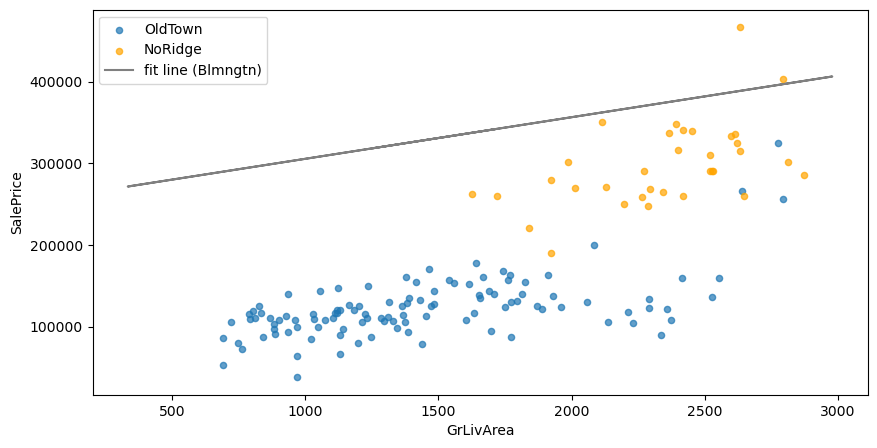

In [83]:
# Your code here - import plotting library and create visualization
import matplotlib.pyplot as plt

# Filter to houses in specific neighborhoods
oldtown = ames[ames["Neighborhood"] == "OldTown"]
noridge = ames[ames["Neighborhood"] == "NoRidge"]

fig, ax = plt.subplots(figsize=(10,5))

# Create scatter plots with 2 different colors
oldtown.plot.scatter(x="GrLivArea", y="SalePrice", alpha=0.7, label="OldTown", ax=ax)
noridge.plot.scatter(x="GrLivArea", y="SalePrice", alpha=0.7, color="orange", label="NoRidge", ax=ax)

# Plot best fit line
intercept = baseline_results.params["const"]
slope = baseline_results.params["GrLivArea"]
ax.plot(ames["GrLivArea"], intercept + ames["GrLivArea"] * slope, color="gray", label="fit line (Blmngtn)")

ax.legend();

Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

In [70]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

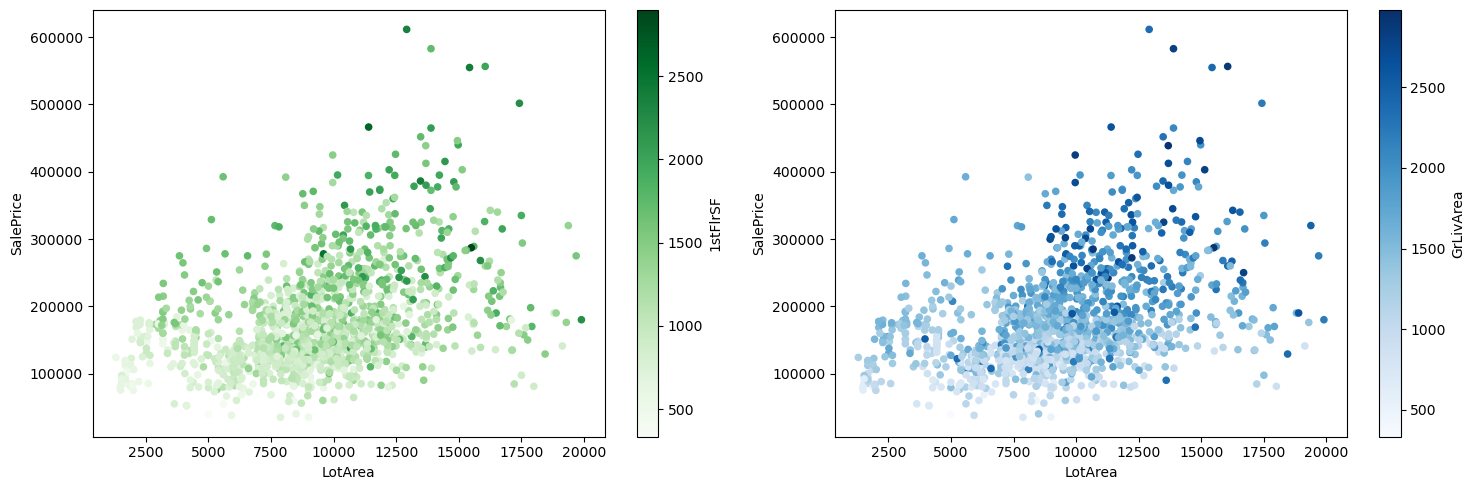

In [84]:
# Your code here - create two visualizations
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ames.plot.scatter(x="LotArea", y="SalePrice", c="1stFlrSF", cmap="Greens", ax=ax1)
ames.plot.scatter(x="LotArea", y="SalePrice", c="GrLivArea", cmap="Blues", ax=ax2)
fig.tight_layout();

Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

In [72]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [85]:
# Your code here - build a model with one or more interaction terms
X_interaction = pd.concat([ames_numeric, ames_categorical], axis=1)

X_interaction["GrLivArea x Neighborhood_NoRidge"] = X_interaction["GrLivArea"] *\
                        X_baseline["Neighborhood_NoRidge"]
X_interaction["LotArea x 1stFlrSF"] = X_interaction["LotArea"] * X_interaction["1stFlrSF"]

interaction_model = sm.OLS(y, sm.add_constant(X_interaction))
interaction_results = interaction_model.fit()

### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

In [86]:
# Your code here - evaluate the model with interactions
print(interaction_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     212.1
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:34:29   Log-Likelihood:                -16363.
No. Observations:                1396   AIC:                         3.279e+04
Df Residuals:                    1363   BIC:                         3.296e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [75]:
# Your written answer here


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall still explains about 83% of the variance in sale price. The baseline explained 82.7% whereas this model explains 82.9%, so it's a marginal improvement.
    
* Coefficients for the intercept as well as all continuous variables are still statistically significant
* Coefficients for `KitchenQual` are still statistically significant
* `Neighborhood_NoRidge` used to be statistically significant but now it is not
* `GrLivArea x Neighborhood_NoRidge` is not statistically significant
* `LotArea x 1stFlrSF` is statistically significant

</details>

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

In [87]:
# Your written answer here
interaction_results.params["const"]

258372.23038725575

In [88]:
interaction_results.params["LotArea"]

2.581022167715435

In [89]:
interaction_results.params["1stFlrSF"]

30.5396887050614

In [90]:
interaction_results.params["LotArea x 1stFlrSF"]

0.0027043505192363747

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!